<a href="https://colab.research.google.com/github/MoeSaleh24/School-Projects/blob/main/Diamond_Prediction_(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
import math

We have to add columns to the score set in order for the prediction to work.



In [ ]:
path_ds = "/content/drive/MyDrive/INNFO367/Week 3-4/Diamond Shape/diamonds_score.csv"
df_score = pd.read_csv(path_ds)

In [ ]:
path_dt = "/content/drive/MyDrive/INNFO367/Week 3-4/Diamond Shape/diamonds_train.csv"
df_train = pd.read_csv(path_dt)

df_train.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [ ]:
missing_values = df_train.isnull().sum()
print(missing_values)

shape                 0
cut                   0
color                 0
clarity               0
weight_ct             0
fluorescence          0
length_width_ratio    0
polish                0
symmetry              0
girdle                0
cutlet                0
price                 0
depth                 0
table                 0
length                0
width                 0
height                0
dtype: int64


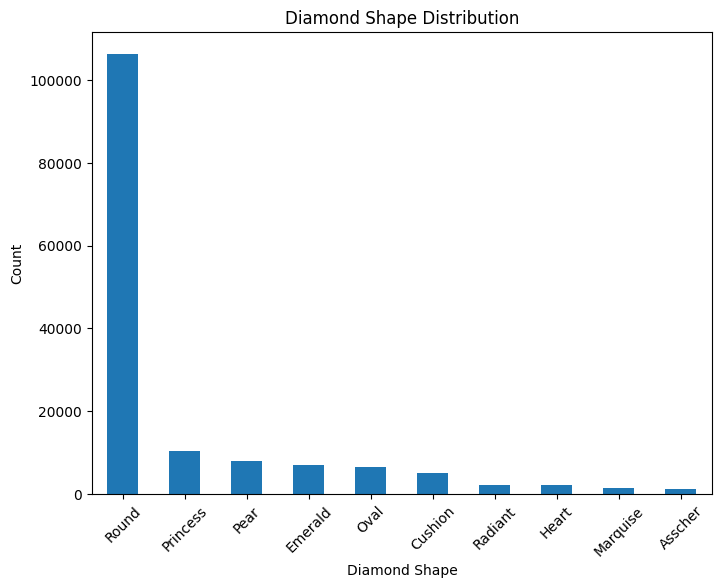

In [ ]:
shape_counts = df_train['shape'].value_counts()

plt.figure(figsize=(8, 6))
shape_counts.plot(kind='bar')
plt.title('Diamond Shape Distribution')
plt.xlabel('Diamond Shape')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- We can see that round shaped diamonds are predominant in this distribution.

- This means that the shape of diamonds are one of the driving forces for price.

- The price of the product escalates in direct proportion to its level of demand.

In [ ]:
round_diamonds_df = df_train[df_train['shape'] == 'Round']

round_diamonds_df.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74
5,Round,Ideal,K,VVS2,0.40,StrongInfo,1.01,Excellent,Very Good,Medium to Slightly Thick,None,565,60.1,61.0,4.80,4.73,2.86
7,Round,Ideal,I,VVS2,0.50,NoneInfo,1.01,Very Good,Very Good,Medium to Slightly Thick,None,1290,60.0,60.0,5.14,5.20,3.10


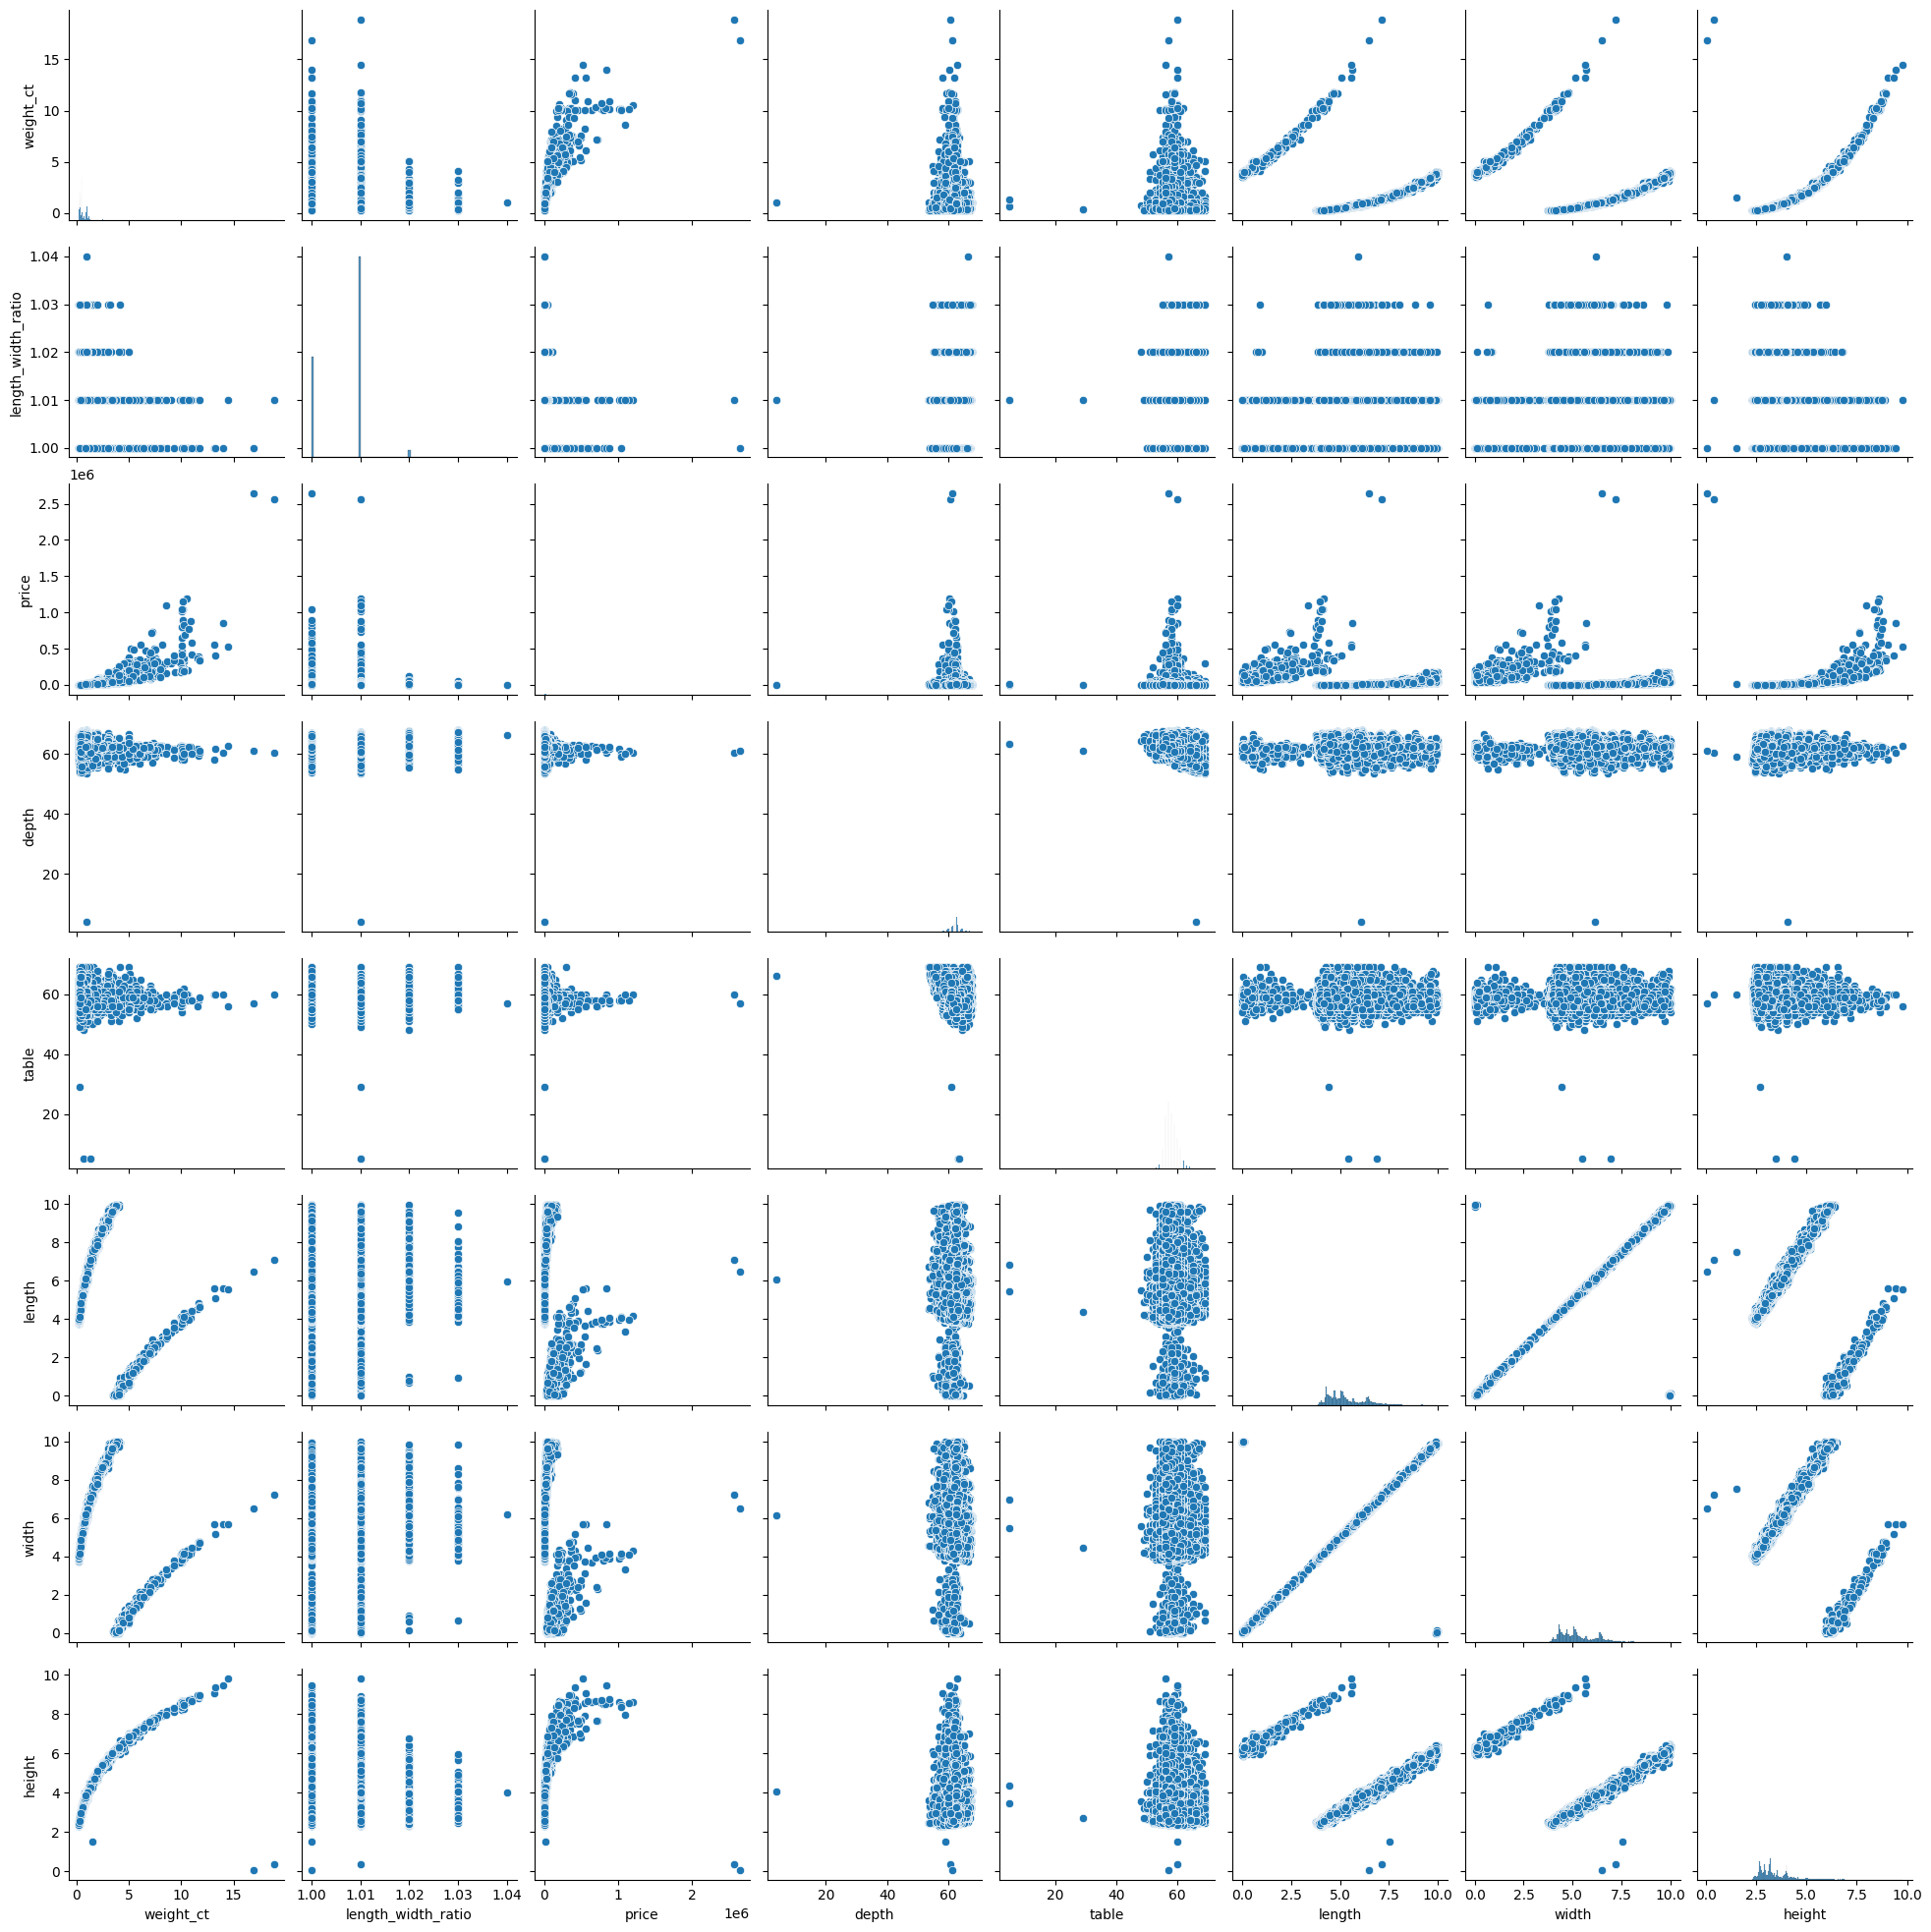

In [ ]:
sns.pairplot(round_diamonds_df)
plt.show()

 **Price's Linear Relationship with Predictors (Vertical Analyzation)**

**weight_ct**

Linear Relationship: Present /
Homoscedasticity: Non-Present /
Outliers: Presnt

**length_width_ratio**

Linear Relationship: Present /
Homoscedasticity: None-Present /
Outliers: Present

**depth**

Linear Relationship: Present /
Homoscedasticity: Present /
Outliers: Present

**table**

Linear Relationship: Present /
Homoscedasticity: Present /
Outliers: Present

**Length**

Linear Relationship: Non-Present /
Homoscedasticity: Non-Present /
Outliers: Present

**width**

Linear Relationship: Present /
Homoscedasticity: Non-Present /
Outliers: Present

**height**

Linear Relationship: Present /
Homoscedasticity: Non-Present /
Outliers: Present

In [ ]:
z_scores = stats.zscore(round_diamonds_df.select_dtypes(include=['number']))

threshold = 3

df_no_outliers = round_diamonds_df[(z_scores < threshold).all(axis=1)]

In [ ]:
imputed = round_diamonds_df.fillna(df_train.mean(numeric_only=True))

In [ ]:
imputed.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,106261.000000,106261.000000,1.062610e+05,106261.000000,106261.000000,106261.000000,106261.000000,106261.000000
mean,0.742399,1.006993,5.252969e+03,62.179249,57.952478,5.419384,5.414422,3.413124
std,0.660936,0.005141,2.222450e+04,1.521566,2.052091,1.184975,1.187471,0.759521
min,0.230000,1.000000,2.820000e+02,4.000000,5.000000,0.000000,0.000000,0.070000
25%,0.370000,1.000000,7.100000e+02,61.400000,56.000000,4.570000,4.560000,2.850000
50%,0.510000,1.010000,1.387000e+03,62.300000,58.000000,5.130000,5.120000,3.190000
75%,1.000000,1.010000,4.579000e+03,62.800000,59.000000,6.210000,6.220000,3.920000
max,18.910000,1.040000,2.641889e+06,67.800000,69.000000,9.990000,9.990000,9.800000


In [ ]:
predictors = round_diamonds_df[['weight_ct', 'length_width_ratio', 'price', 'depth', 'table', 'length', 'width', 'height']]

predictors.head()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
1,1.07,1.00,8842,62.4,56.0,6.52,6.54,4.07
3,2.85,1.01,63161,62.7,58.0,9.06,9.00,5.66
4,0.35,1.00,653,59.9,59.0,4.57,4.59,2.74
5,0.40,1.01,565,60.1,61.0,4.80,4.73,2.86
7,0.50,1.01,1290,60.0,60.0,5.14,5.20,3.10


In [ ]:
imputed.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [ ]:
X = pd.get_dummies(predictors, drop_first=True)
y = imputed['price']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['weight_ct', 'length_width_ratio', 'price', 'depth', 'table', 'length',
       'width', 'height'],
      dtype='object')

In [ ]:
re_prices.intercept_

-2.764863893389702e-10

In [ ]:
re_prices.coef_

array([ 2.11766353e-12,  2.73712053e-10,  1.00000000e+00, -3.88797680e-14,
       -1.37364002e-14, -4.00375262e-14, -4.70432883e-14,  5.55875197e-14])

In [ ]:
train_X.head()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
51372,0.30,1.01,434,61.4,61.0,4.31,4.28,2.64
6513,1.51,1.00,12366,62.3,56.0,7.32,7.34,4.57
64091,0.30,1.01,418,60.9,59.0,4.29,4.32,2.62
135004,0.30,1.01,601,62.5,57.0,4.30,4.27,2.67
53742,0.50,1.01,1204,61.7,58.0,5.09,5.06,3.13


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  1.0
MAE:  3.855504425746205e-12
RMSE:  1.0035956983930586e-11
Max error:  4.656612873077393e-10


- This is a good model since R2, MAE, RMSE, and Max Errorr show small number results. The higher the numbers the more that the business has to sacrafice, and business are not willing to tolrate huge losses.


In [ ]:
train_X.head()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
51372,0.30,1.01,434,61.4,61.0,4.31,4.28,2.64
6513,1.51,1.00,12366,62.3,56.0,7.32,7.34,4.57
64091,0.30,1.01,418,60.9,59.0,4.29,4.32,2.62
135004,0.30,1.01,601,62.5,57.0,4.30,4.27,2.67
53742,0.50,1.01,1204,61.7,58.0,5.09,5.06,3.13


In [ ]:
predictors_train = df_train [['weight_ct', 'length_width_ratio', 'price', 'depth', 'table', 'length', 'width', 'height']]

predictors_train.head()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
0,1.70,1.29,13519,68.1,70.0,7.94,6.17,4.20
1,1.07,1.00,8842,62.4,56.0,6.52,6.54,4.07
2,1.05,1.20,4817,71.3,68.0,6.15,5.12,3.65
3,2.85,1.01,63161,62.7,58.0,9.06,9.00,5.66
4,0.35,1.00,653,59.9,59.0,4.57,4.59,2.74


- The price of the diamonds are heavly affected by the weight, which increases the depth, length, width, and height of diamonds. So weight is the driving force here.

- We can tell that the shape of the diamonds from eariler and with the weight that they coorrlate hand in hand. The heavier the diamond, the more expensive it is. Same as with shape, the more demanded, the higher it is priced.